# 1. Business understanding

####  In a study about daily habits, the Work-Life Balance survey evaluates how we thrive in both professional and personal lives: it was mainly about 5 aspects of our lives:
 1. Healthy body, reflecting your fitness and healthy habits;
 2. Healthy mind, indicating how well you embrace positive emotions;
 3. Expertise, measuring the ability to grow your expertise and achieve something unique;
 4. Connection, assessing the strength of your social network and your inclination to discover the world;
 5. Meaning, evaluating your compassion, generosity and how much 'you are living the life of your dream'.
 
#### This survey triggered many questions in my mind, most importantly :
- When are the most stressed? 
- Who is more stressed?
- What is the correlation between the studied parameters and how do they correlate with the daily stress?

For some of the questions I used seaborn and matplotlib to generate plots, for the others I relied more on visualizing the correlation between the attributes of interest. For instance a correlation map was more appropriate to understand the correlation between all the attributes,whereas a Pearson correlation method was more helpfull to generate a plot representing clearly the correlation between the atributes and the daily stress 

# 2. Data understanding

The result of the survey was compiled in a kaggle  dataset  by Yvon Dalat. It is a 23 * 12755 table with the 23 studied attributes for each one of the survey respondents.

In [2]:

import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/lifestyle-and-wellbeing-data/Wellbeing_and_lifestyle_data.csv


In [3]:
data=pd.read_csv('/kaggle/input/lifestyle-and-wellbeing-data/Wellbeing_and_lifestyle_data.csv')

data=data[data.DAILY_STRESS !='1/1/00']
data['DAILY_STRESS']=pd.to_numeric(data['DAILY_STRESS'])
data.columns=[x[0]+x[1:].lower()for x in data.columns]
data

,Timestamp,Fruits_veggies,Daily_stress,Places_visited,Core_circle,Supporting_others,Social_network,Achievement,Donation,Bmi_range,...,Live_vision,Sleep_hours,Lost_vacation,Daily_shouting,Sufficient_income,Personal_awards,Time_for_passion,Daily_meditation,Age,Gender
0,7/7/15,3,2,2,5,0,5,2,0,1,...,0,7,5,5,1,4,0,5,36 to 50,Female
1,7/7/15,2,3,4,3,8,10,5,2,2,...,5,8,2,2,2,3,2,6,36 to 50,Female
2,7/7/15,2,3,3,4,4,10,3,2,2,...,5,8,10,2,2,4,8,3,36 to 50,Female
3,7/7/15,3,3,10,3,10,7,2,5,2,...,0,5,7,5,1,5,2,0,51 or more,Female
4,7/7/15,5,1,3,3,10,4,2,4,2,...,0,7,0,0,2,8,1,5,51 or more,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12751,2/23/2020 22:03:56,3,4,10,8,10,8,6,5,1,...,3,7,0,1,1,10,6,7,21 to 35,Female
12752,2/24/2020 2:44:30,3,3,6,5,2,5,1,0,2,...,0,7,0,0,2,3,0,2,36 to 50,Female
12753,2/24/2020 10:35:02,4,4,7,5,3,3,4,2,1,...,5,6,0,2,2,6,3,5,36 to 50,Female
12754,2/24/2020 12:54:10,3,3,10,4,8,10,3,3,1,...,1,6,0,1,1,10,1,10,21 to 35,Female


(-1.112845910019693,
 1.1449834146467173,
 -1.303733181698205,
 1.2732103401537644)

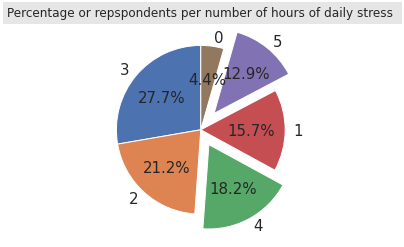

In [36]:
# A pie chart to have an overview of the percentage of respondents for the different number of  hours of daily stress (0-5)
stress_data=(data['Daily_stress'].value_counts()*100)/(data.shape[0])


explode = (0, 0, 0.2, 0, 0.25, 0) 
plt.pie(stress_data, labels=stress_data.index,explode=explode, autopct='%1.1f%%',shadow=False, startangle=90,textprops={'fontsize': 15})
plt.title('Percentage or repspondents per number of hours of daily stress ',bbox={'facecolor':'0.9', 'pad':5})
plt.axis('equal')



#### 30 % of the respondents qualify themselves as highly stressed with 4 (18.2%) to 5 hours (12.9%) of daily stress

# 3. Prepare Data

In [5]:
def plotsns(data,param,x_lab,y_lab):
    '''takes in the data frame, the parameter to plot and the labels of the axis and return the plot'''
    sns.set()
    fig=data.set_index(param).T.plot(kind='bar', stacked=True,colormap=ListedColormap(sns.color_palette("GnBu", 10)),figsize=(10,10))
    sns.set_style("whitegrid", {'axes.grid' : False})
    fig.set_ylabel(y_lab, fontsize=18)
    fig.set_xlabel(x_lab, fontsize=18)
    fig.tick_params(rotation= 45,labelsize=20)

    
def percentage(data_p):
    '''takes in the data frame and return a data frame with all the values converted to their percentage per column'''
    summ=data_p.sum(axis=0)
    data_p=data_p*100/summ
    return data_p

In [6]:
# prepare a numeric data frame (data_num) containing the attributes that will be plotted in function of the age range (data_age )

data_age=pd.get_dummies(data['Age'])

data_num=pd.DataFrame(data.drop(['Timestamp','Gender','Age'],axis=1))

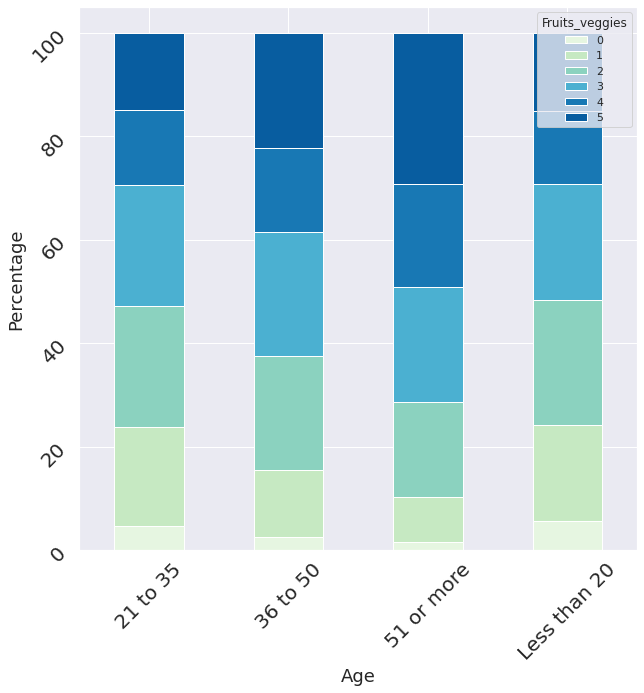

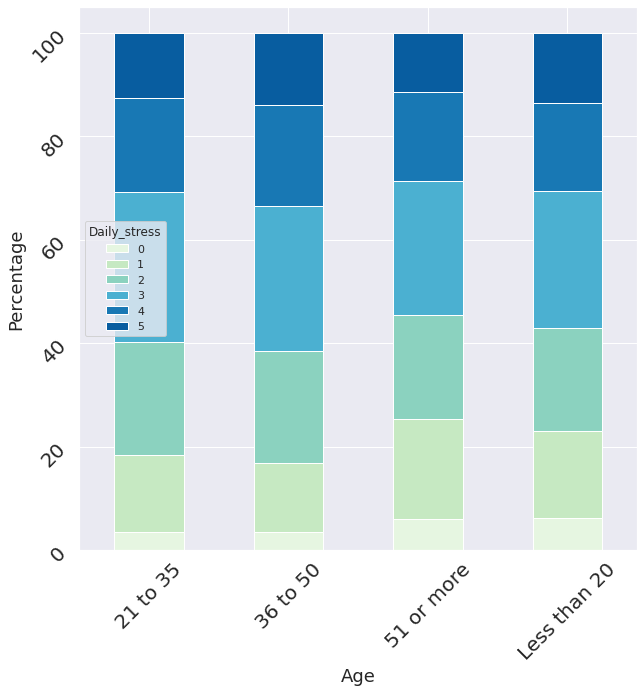

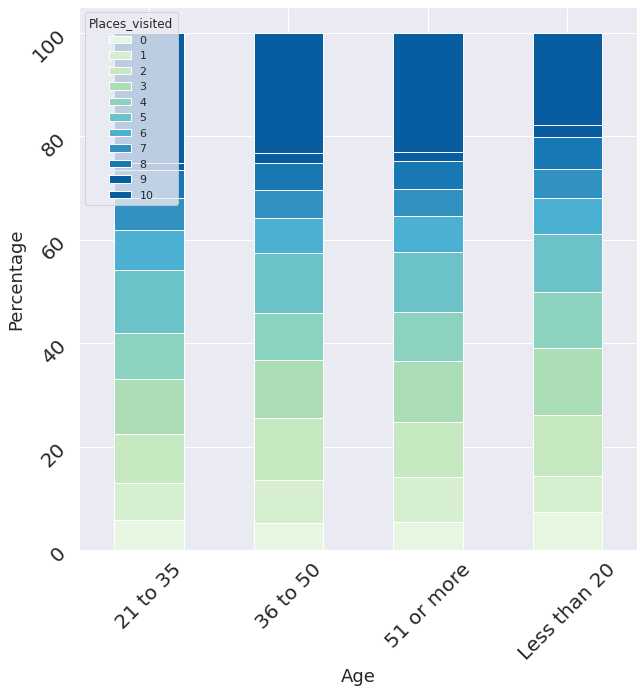

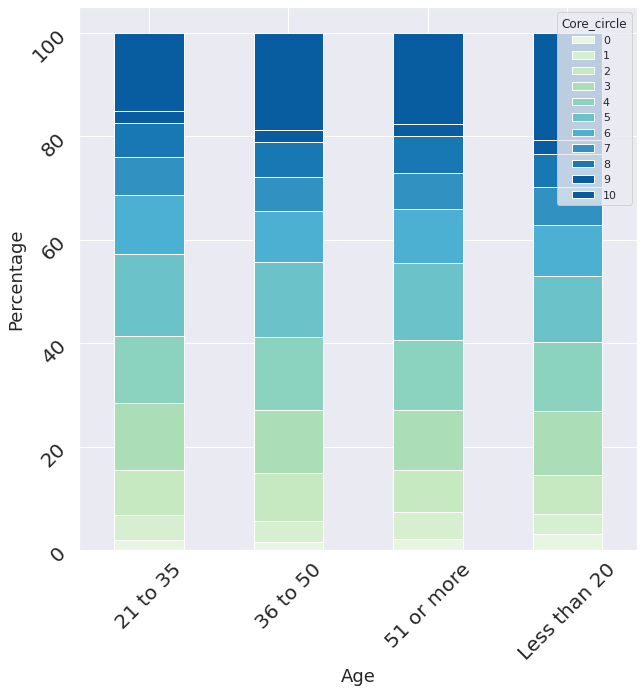

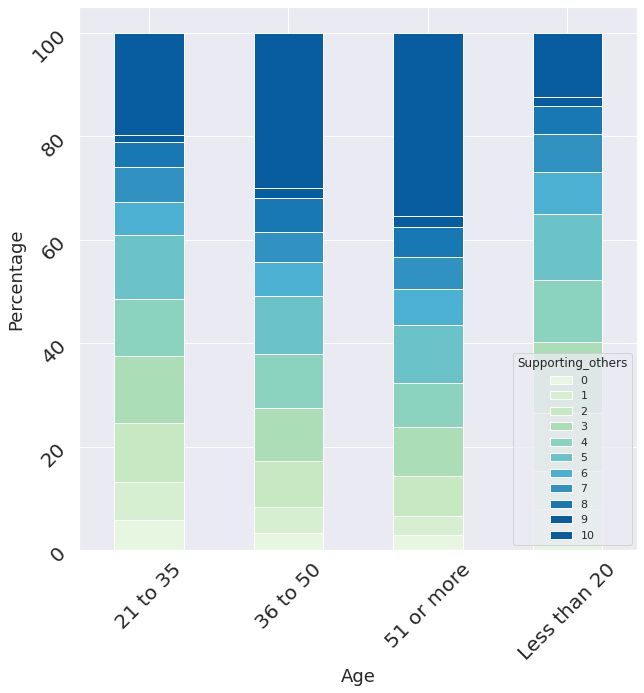

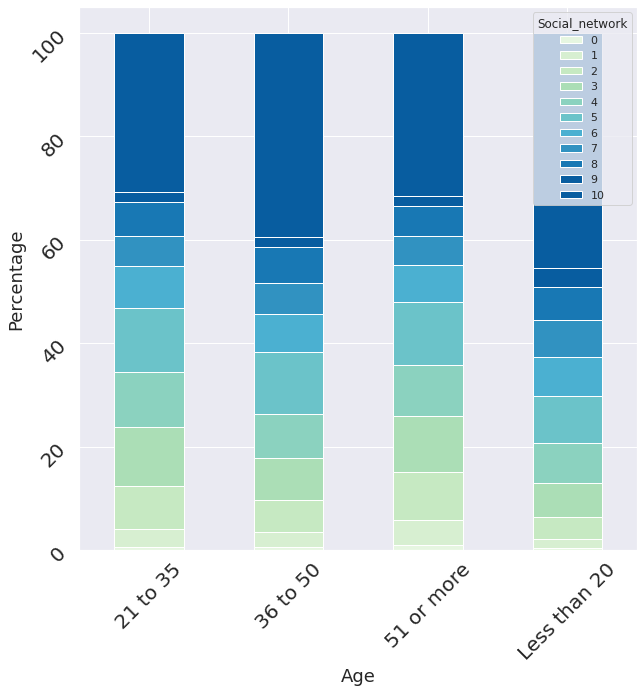

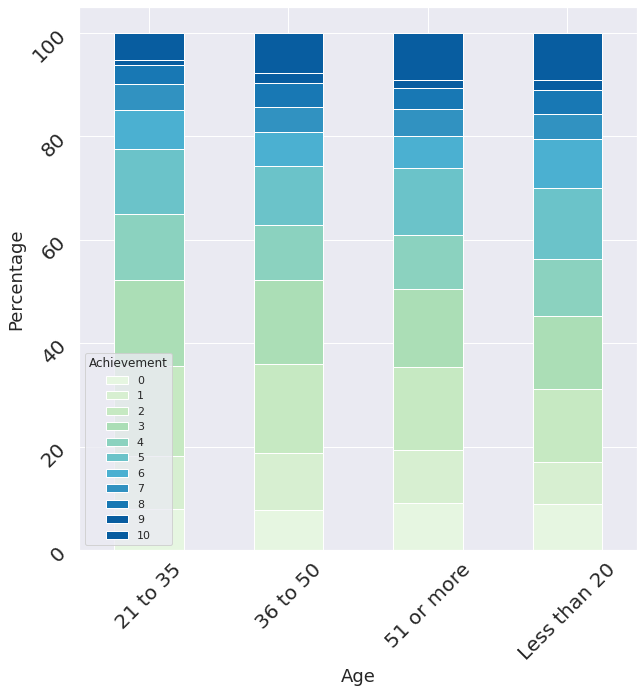

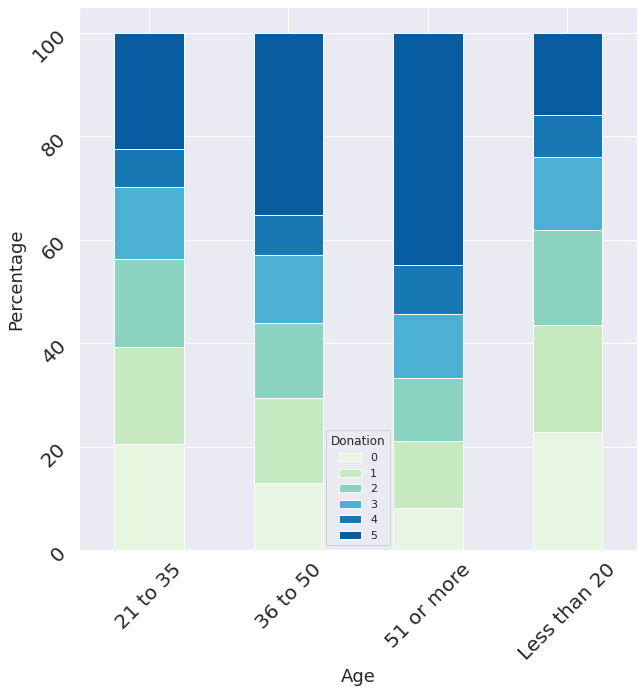

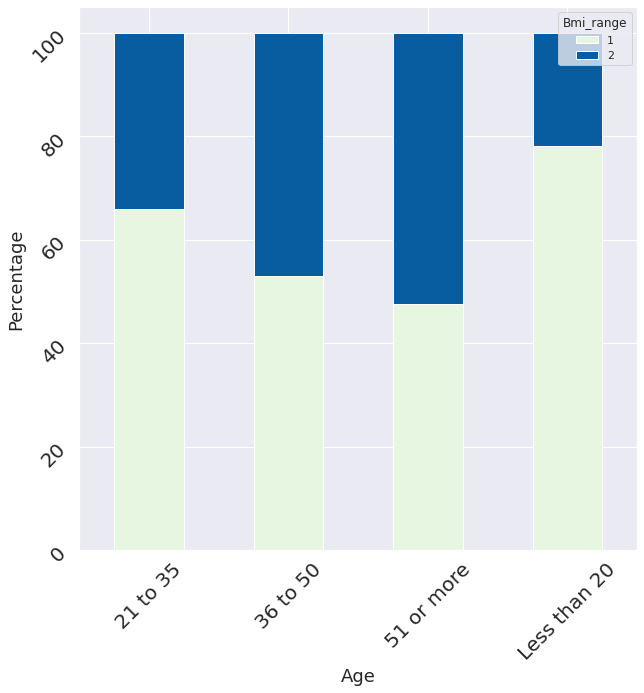

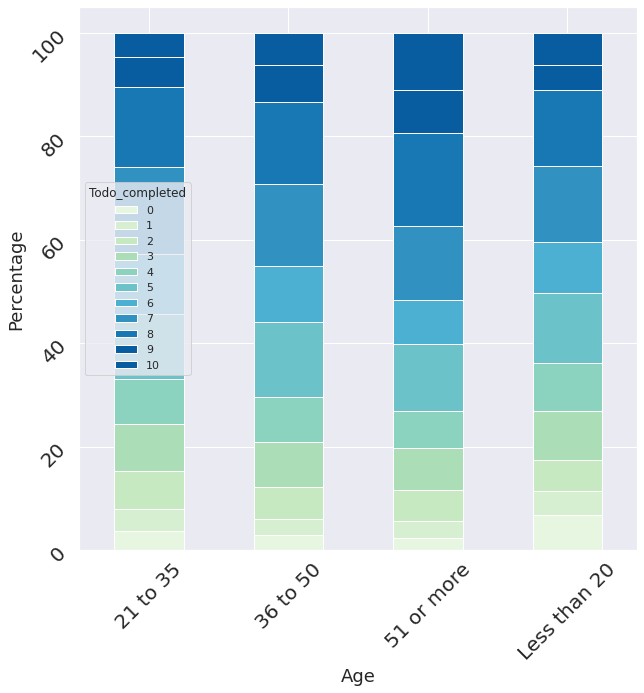

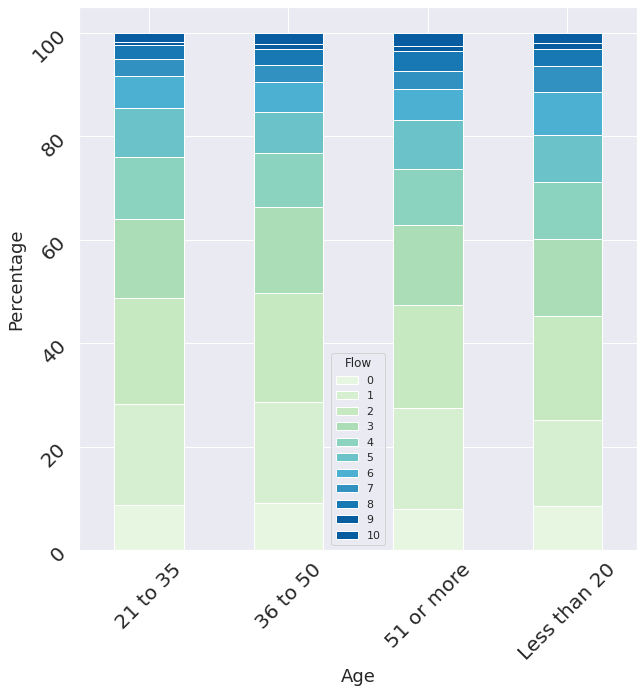

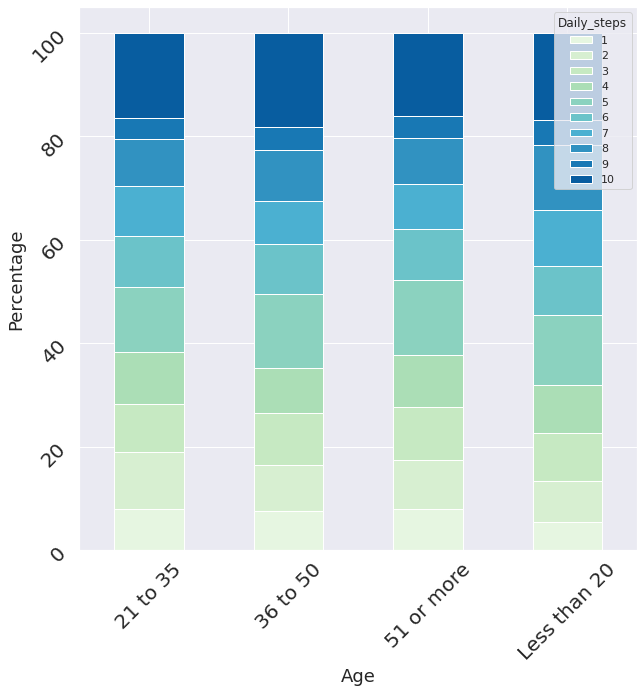

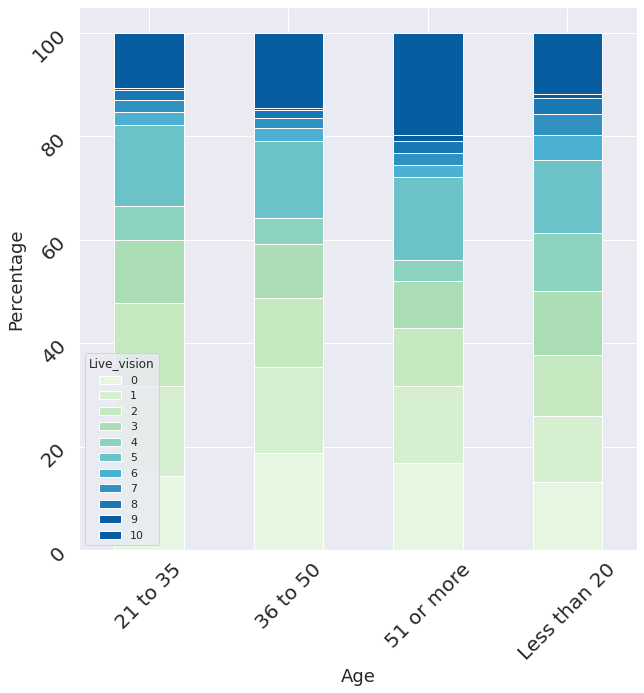

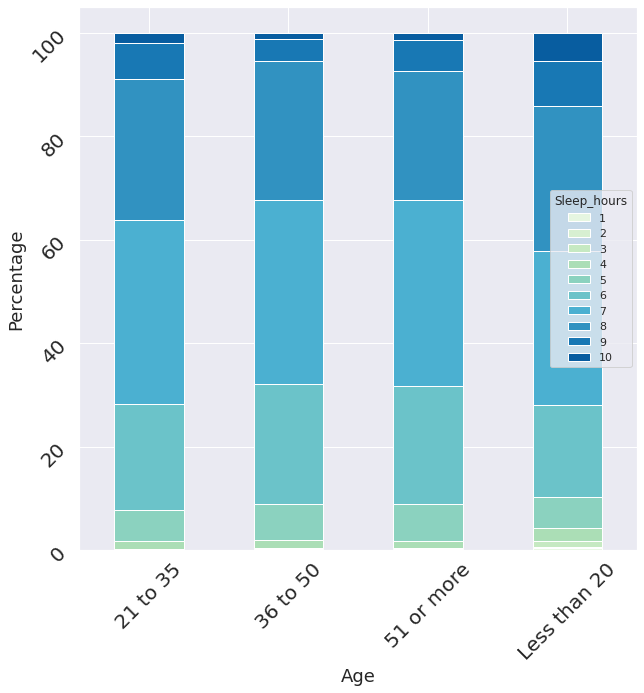

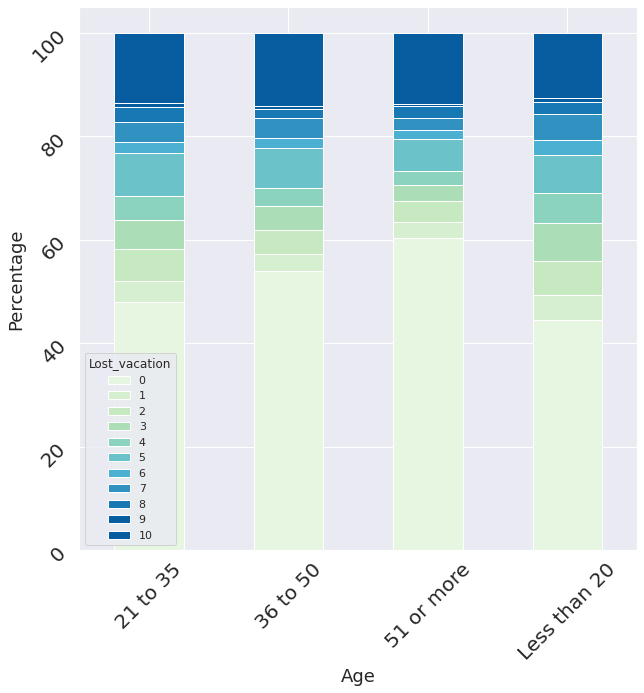

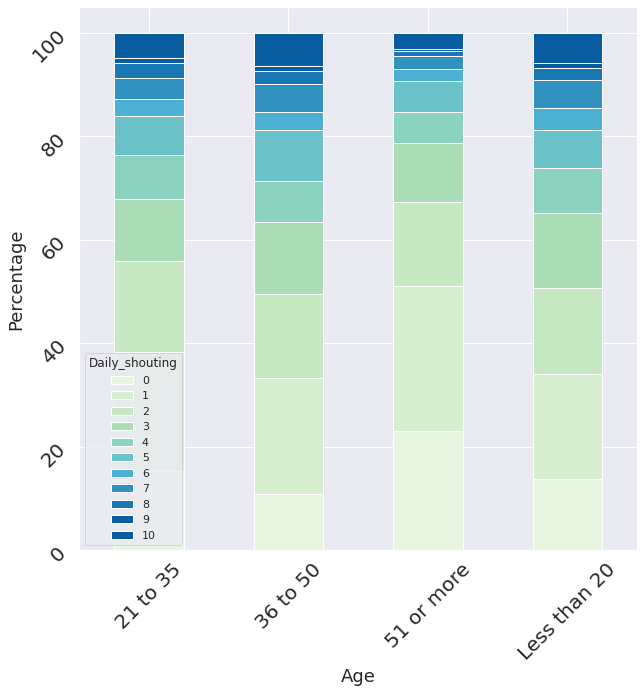

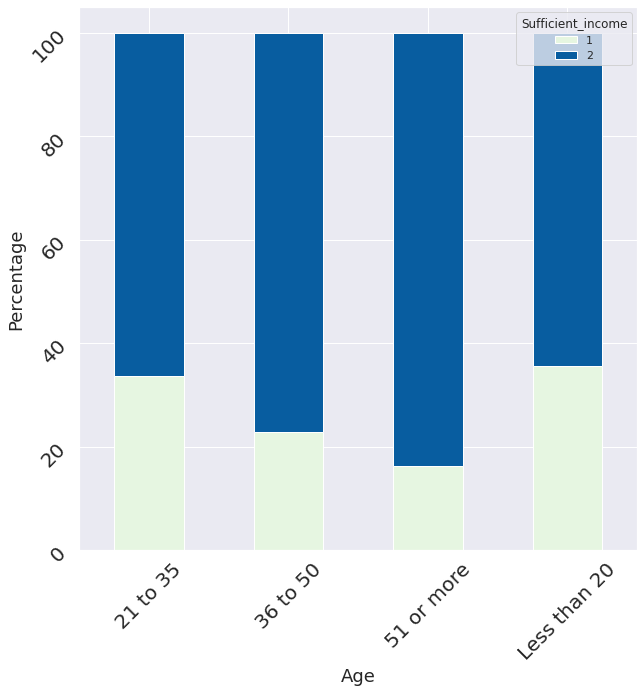

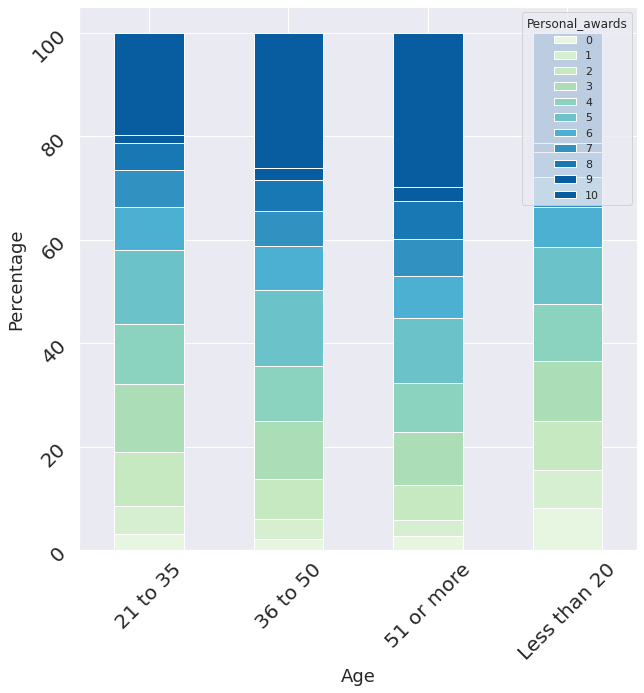

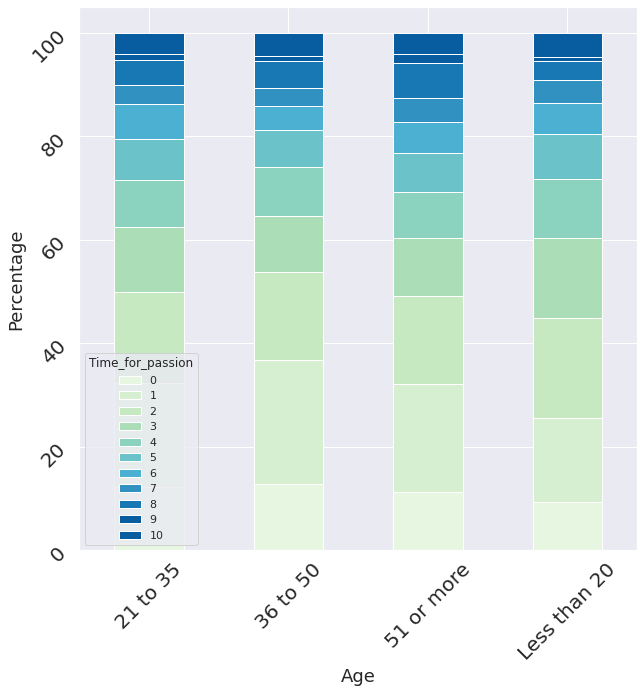

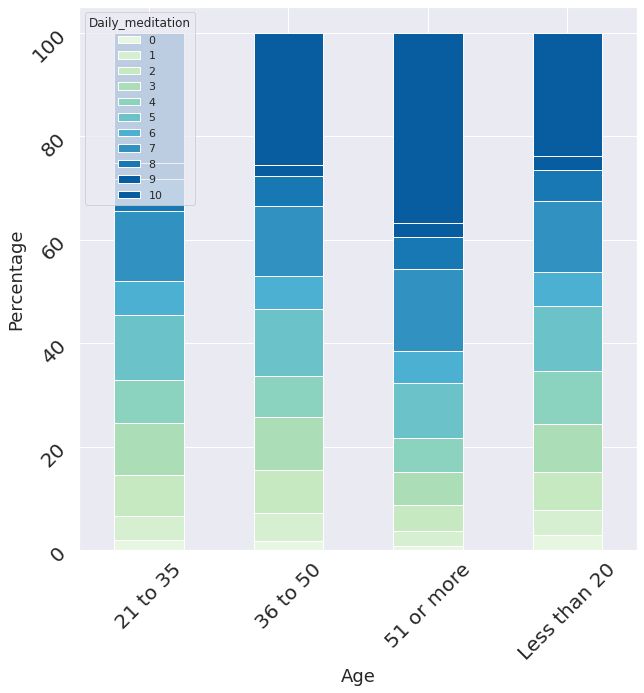

In [7]:
# To compare the 22 attributes for the 4 age ranges,a for loop is used to generate a plot for each one of the numeric attributes  in 
# function of the age ranges.

data_perc_per_age=[]

for i,col in enumerate(data_num):
    col=str(col)
    data_age_i=pd.concat([data_num[col],data_age],axis=1).groupby(col).sum()
    data_age_i.index.name=col
    data_age_i=percentage(data_age_i)
    
    data_perc_per_age.append(data_age_i)
    
for df in (data_perc_per_age):
    plotsns(df,df.index, 'Age','Percentage')


# 4. Evaluate the results

## When are we the most stressed?

In [8]:
# Calculate for each one of the age ranges the percentage of respondents for the different numbers of daily hours of  stress
data_age=pd.concat([data['Daily_stress'],pd.get_dummies(data['Age'])],axis=1).groupby('Daily_stress').sum()
data_age.index.name='Daily_stress'
data_age=percentage(data_age)

data_age

,21 to 35,36 to 50,51 or more,Less than 20
Daily_stress,,,,
0,3.593303,3.519956,6.026786,6.213965
1,14.842793,13.386918,19.456845,16.912236
2,21.906901,21.563193,20.014881,19.795003
3,28.848510,28.021064,25.930060,26.521461
4,18.191098,19.484479,17.113095,17.040359
5,12.617395,14.024390,11.458333,13.516976


#### The comparison of the 5 level of stress for the 4 age ranges, shows that people between 36 and 50 years old have the highest percentage of highly stressed people with 33.5% of them having 4 to 5 hours of daily stress.They are closely followed by the 21 to 35 years old ones that 31% of them have more than 4 hours of daily stress.

### -> 21 to 50 years old is then the most stressful 30 years.



## Who's more stressed?

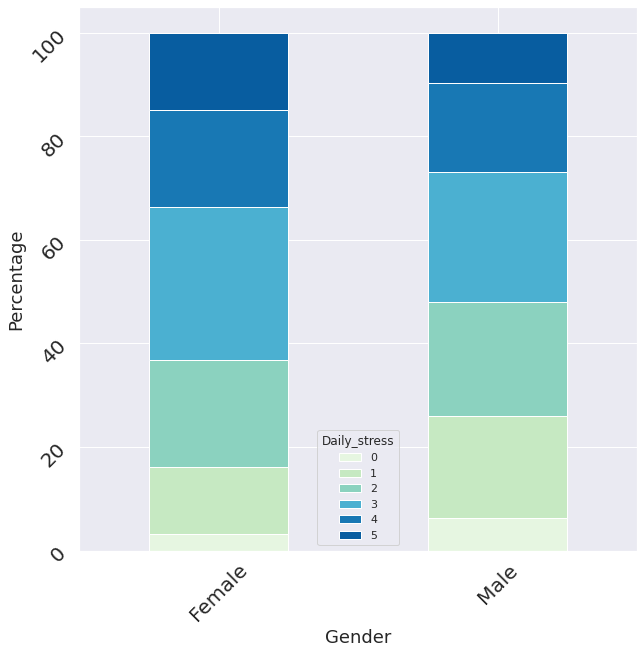

In [9]:
data_gender=pd.concat([data['Daily_stress'],pd.get_dummies(data['Gender'])],axis=1).groupby('Daily_stress').sum()
data_gender=percentage(data_gender)

plotsns(data_gender,data_gender.index,'Gender','Percentage')


#### It turns out that women are more stressed. Based only on those attributes, there is no clear reason why. It would have been more interesting for this question to include in the survey the marital state and the number of children.

## How does the  23 attributes correlate?

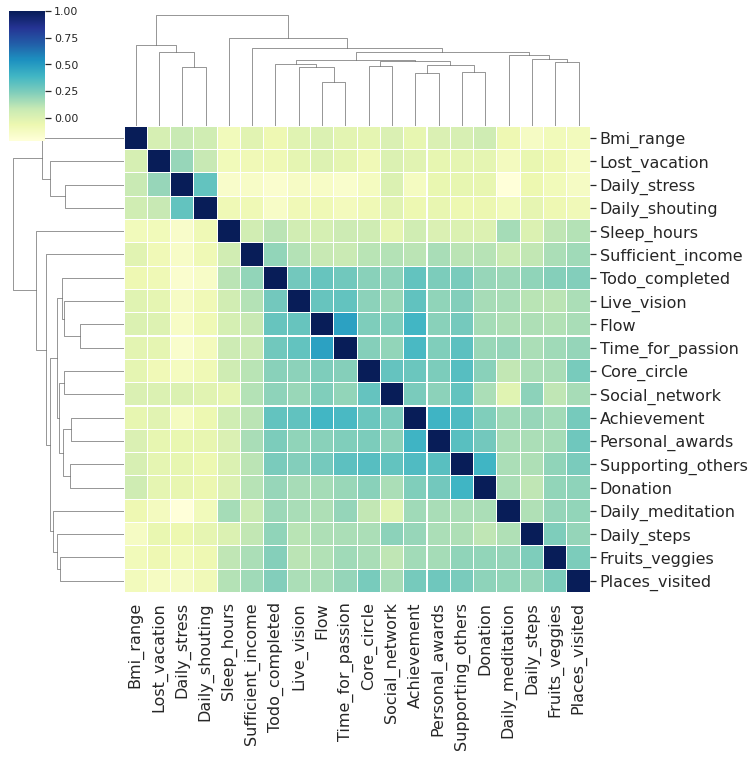

In [10]:
corrmat = data.corr() 
map_corr= sns.clustermap(corrmat, cmap ="YlGnBu", linewidths = 0.1)
plt.setp(map_corr.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0) 
map_corr.ax_heatmap.set_xticklabels(map_corr.ax_heatmap.get_xmajorticklabels(), fontsize = 16)
map_corr.ax_heatmap.set_yticklabels(map_corr.ax_heatmap.get_ymajorticklabels(), fontsize = 16)

map_corr
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

#### It is  interesting to see that among the highest correlation there is :  
#### *     Time for passion- Flow 
#### *     Time for passion - Achievement
 
#### 'time for passion' is the time we dedicate to what we enjoy doing. It can be  work, hobbies or volunteering. It is important to have time for passion in our busy lives because it is highly correlated with the 'flow' which is ,as described in the survey: "*Flow is defined as the mental state, in which you are fully immersed in performing an activity. You then experience a feeling of energized focus, full involvement, and enjoyment in the process of this activity*." Mihaly Csikszentmihalyi decribed it as " *the secret to happiness*"
 
#### According to the correlation maps people doing what they are passionate about are more successful.
  
    

## How does the attributes correlate with daily stress?

#### To have a clear overview of the correlation between the  attributes studied and the daily stress, the pearson correlation method  was used and the result was fitered to select only the daily stress row in the corr_stress data frame.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 <a list of 19 Text major ticklabel objects>)

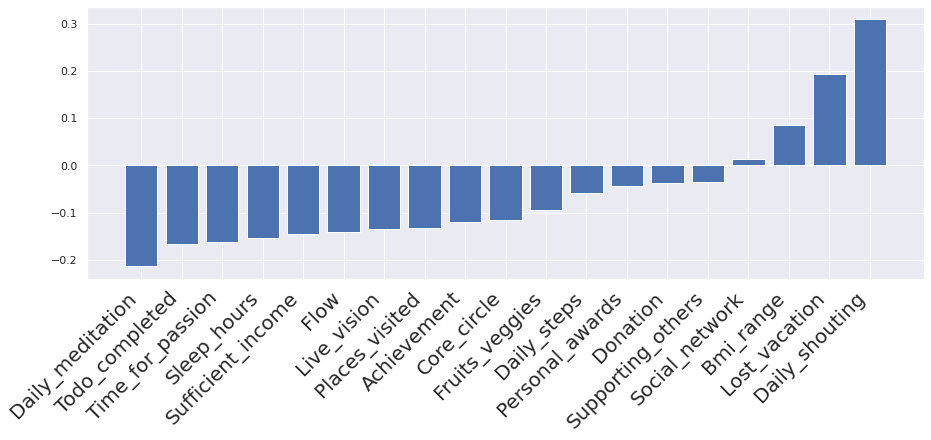

In [11]:
# Generate a data frame  with the correlation between the attributes and select a data frame (corr_stress) having only the correclation to
#daily stress

corr_stress=pd.DataFrame(data.corr(method='pearson').loc['Daily_stress',:])

corr_stress.sort_values(by='Daily_stress', inplace=True)
corr_stress.drop(['Daily_stress'],inplace=True)

sns.set()
f, ax = plt.subplots(figsize=(15,5))
plt.bar(corr_stress.index,corr_stress['Daily_stress'])
plt.xticks(rotation=45,fontsize=20, horizontalalignment="right")

#### The attributes that correlate the most with stress are daily shouting and lost vacation. Daily shouting to others is more a consequence of stress but less time to recharge and disconnect (lost vacation) is a factor that contributes to increasing this stress. Many factors, like sufficient income and sleeping enough improve the well being and reduce this stress. However, what stand out the most is the daily meditation and  time for passion. The exact question asked for daily meditation is:
#### "In a typical week, how many times do you have the opportunity to think  about yourself? Include meditation, praying and relaxation activities such as fitness, walking in a park or lunch breaks"  
#### This makes it clear that people that block time for themselves to disconnect during the week are the less stressed . We live in a super-connected word and if you add to it family and its responsabilities, finding time to ourselves becomes more challenging. It is however crucial for our well being no matter how busy we can be.

 
##### So the main conclusion is that the time we dedicate to our well being is a crucial parameter in improving our work life balance. This means vacation, time with ourselves to focus only on what we need, and time to do what make us happy


#### link for the dataset in kaggle: https://www.kaggle.com/ydalat/lifestyle-and-wellbeing-data  
#### link for the survey:http://www.authentic-happiness.com/your-life-satisfaction-score